In [ ]:
import redlab as rl

# Aufgabe1

BoardNum = 0
Channel = 0
Rang = 101
DataValue = 5
    
def writeOut():
    print(rl.cbVIn(BoardNum, Channel, 1))


def writeIn():
    rl.cbVOut(BoardNum, Channel, Rang, DataValue)


In [75]:
# Aufgabe 2
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.image as mpimg



Umax = 10
Umin = -10
Bits = 11

deltaU = (Umax - Umin) / (2**Bits)
print("Quantisierungsfehler: ", deltaU)

Quantisierungsfehler:  0.009765625


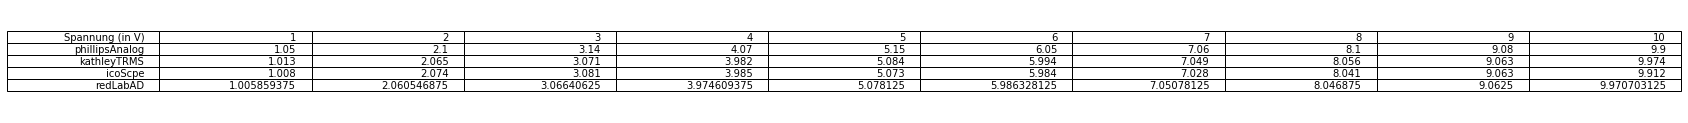

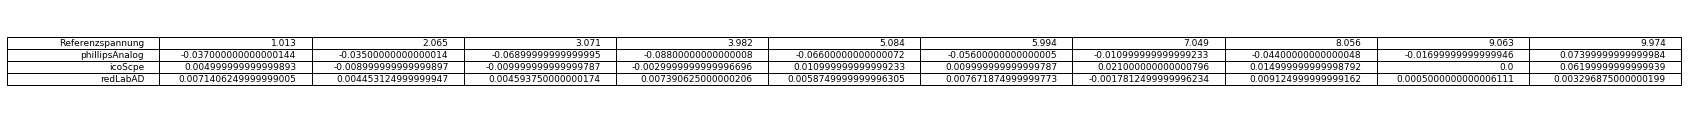

Std(PhililipsAnalog): 0.05813107793790027
Std(icoScpe): 0.0234426012966894
Std(redLabAD): 0.00612348735927771


In [87]:
Voltage1 = ["Spannung (in V)", 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
phillipsAnalog = ["phillipsAnalog", 1.05, 2.1, 3.14, 4.07, 5.15, 6.05, 7.06, 8.1, 9.08, 9.9]
kathleyTRMS = ["kathleyTRMS", 1.013, 2.065, 3.071, 3.982, 5.084, 5.994, 7.049, 8.056, 9.063, 9.974]
icoScpe = ["icoScpe", 1.008, 2.074, 3.081, 3.985, 5.073, 5.984, 7.028, 8.041, 9.063, 9.912]
redLabAD = ["redLabAD", 1.005859375, 2.060546875, 3.06640625, 3.974609375, 5.078125, 5.986328125, 7.05078125, 8.046875, 9.0625, 9.970703125]


tab = [Voltage1, phillipsAnalog, kathleyTRMS, icoScpe, redLabAD]
plt.rcParams['figure.figsize'] = [30, 2]
fig, ax = plt.subplots()
table = ax.table(cellText=tab, loc= 'center')
ax.axis('off')
plt.show()


Messfehler = []

for i in range(4):
    Messfehler.append([])
Messfehler[0].append("Referenzspannung")
Messfehler[1].append("phillipsAnalog")
Messfehler[3].append("redLabAD")
Messfehler[2].append("icoScpe")

for i in range(1,11):
    Messfehler[0].append(kathleyTRMS[i])
    Messfehler[1].append(kathleyTRMS[i] - phillipsAnalog[i])
    Messfehler[3].append(kathleyTRMS[i] - redLabAD[i])
    Messfehler[2].append(kathleyTRMS[i] - icoScpe[i])

fig, ax = plt.subplots()
table2 = ax.table(cellText= Messfehler, loc='center')
ax.axis('off')
plt.savefig("Messfehler.png")
plt.show()

# Standardabweichung
def stdabw(messung):
    sum = 0
    for i in messung:
        sum += i**2
    return np.sqrt((1/9) * sum)

print("Std(PhililipsAnalog):", stdabw(Messfehler[1][1:]))
print("Std(icoScpe):", stdabw(Messfehler[2][1:]))
print("Std(redLabAD):", stdabw(Messfehler[3][1:]))



Quantisierungsfehler:  0.0048828125


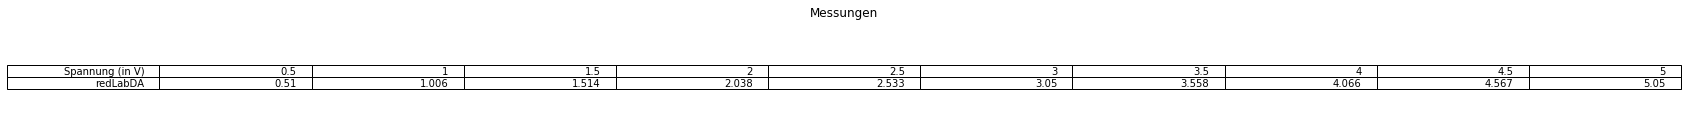

Messfehler =  [-0.010000000000000009, -0.006000000000000005, -0.014000000000000012, -0.03799999999999981, -0.03299999999999992, -0.04999999999999982, -0.05799999999999983, -0.06599999999999984, -0.06700000000000017, -0.04999999999999982]
S = 0.04722758139524441


In [4]:
# Aufgabe 3

print("Quantisierungsfehler: ", 5/(2**10))


Voltage2 = ("Spannung (in V)", 0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5)
redLabDA = ("redLabDA", 0.510, 1.006, 1.514, 2.038, 2.533, 3.05, 3.558, 4.066, 4.567, 5.05)


tab = [Voltage2, redLabDA]
plt.rcParams['figure.figsize'] = [30, 2]
fig, ax = plt.subplots()
table = ax.table(cellText=tab, loc= 'center')
ax.axis('off')
plt.title("Messungen")
plt.show()


Messfehler = []
for i in range(1,11):
    Messfehler.append(Voltage2[i] - redLabDA[i])

print("Messfehler = ", Messfehler)
print("S =", stdabw(Messfehler))

In [5]:
#Aufgabe 4

sinus = [np.sin(2 * np.pi * (i/300)) for i in range(0,300)]

while(1):
    for i in range(0,300):
        rl.cbVOut(BoardNum, Channel, Rang, sinus[i] + 1)

NameError: name 'rl' is not defined

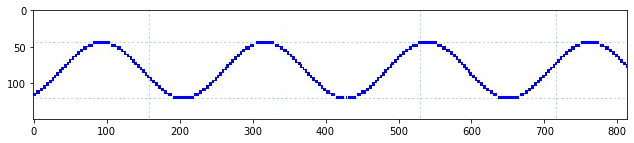

In [48]:
img = mpimg.imread('Sinus2.JPG')
imgplot = plt.imshow(img)
plt.show()

In [ ]:
#Aufgabe5
freq = 7400
sinus = rl.cbVInScan(0,0,0,1000,7000,1)
plt.plot(sinus)
#plt.plot(sinus[100:400])
#np.save(f'sinus_{freq}.png', sinus)

Nyquistfrequenz: 3700.0
Frequenz:  1750


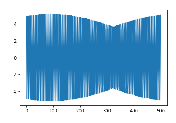

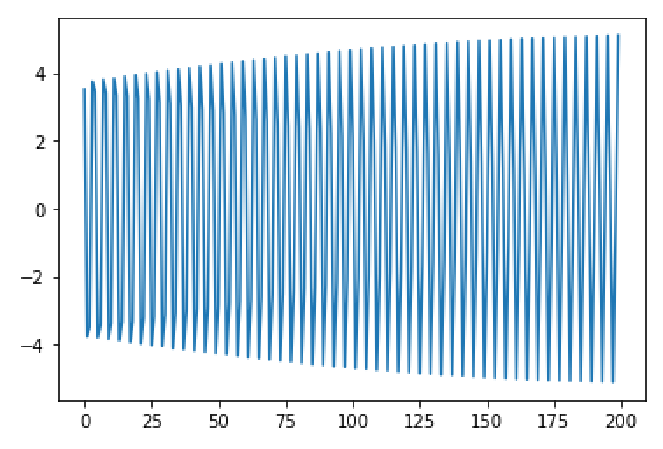

Frequenz:  2300


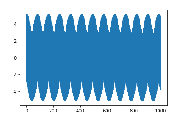

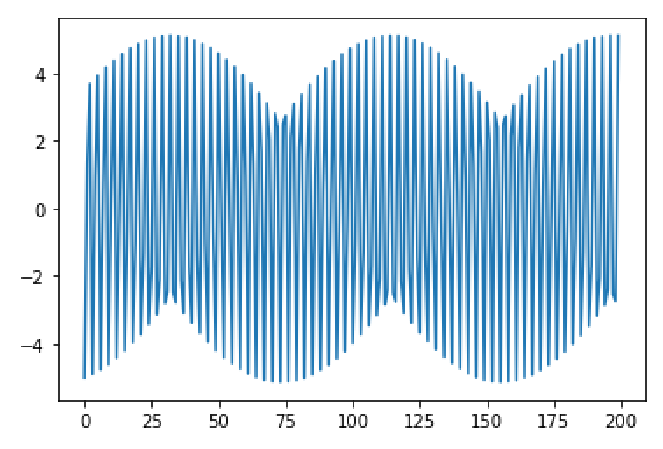

Frequenz:  3000


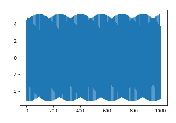

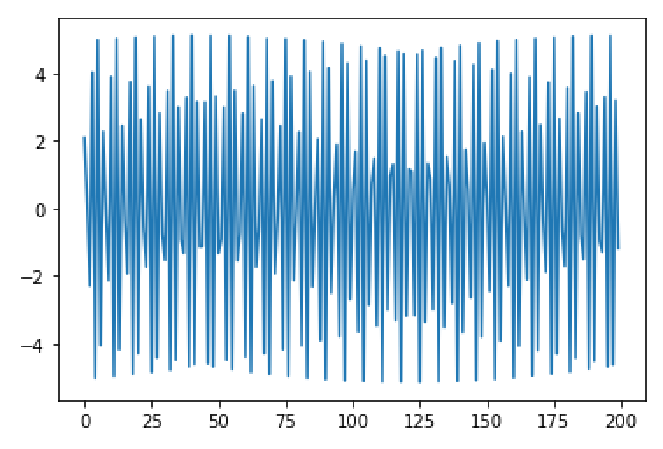

Frequenz:  3500


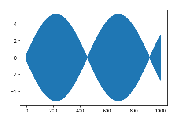

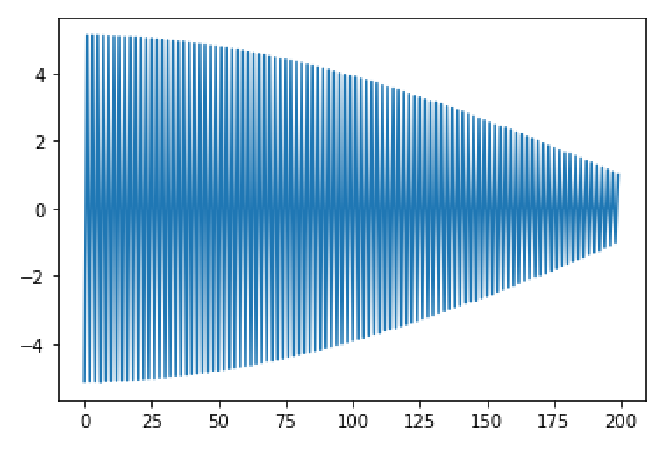

Frequenz:  4000


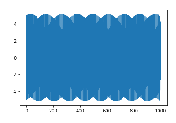

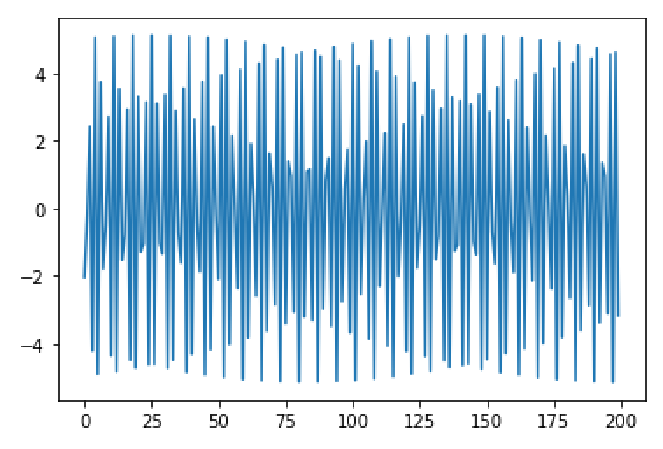

Frequenz:  4600


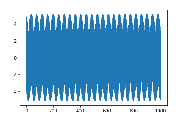

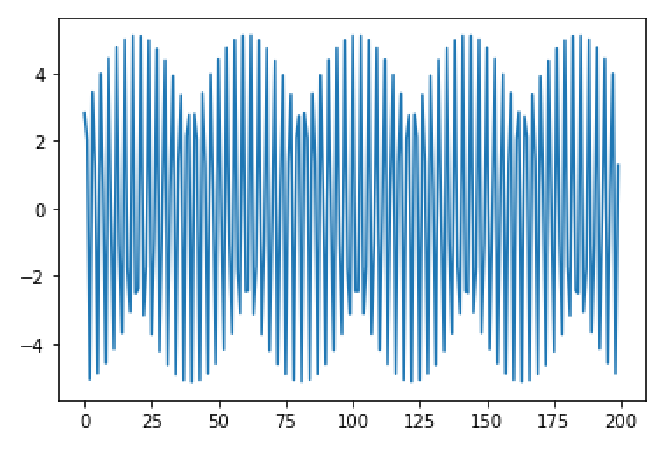

Frequenz:  5200


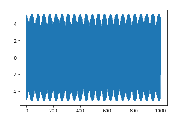

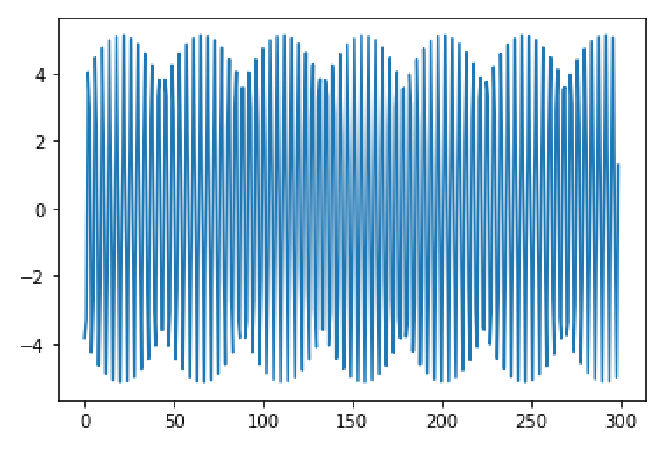

Frequenz:  5800


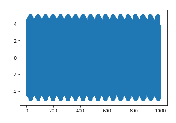

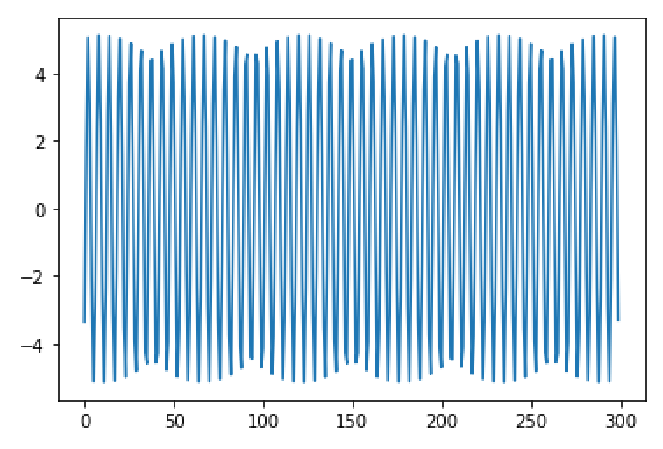

Frequenz:  6400


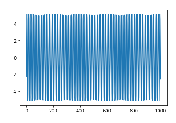

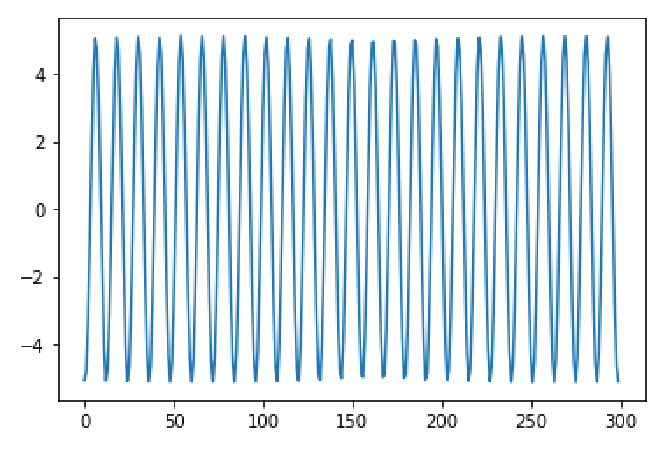

Frequenz:  7000


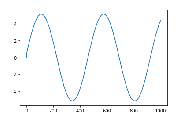

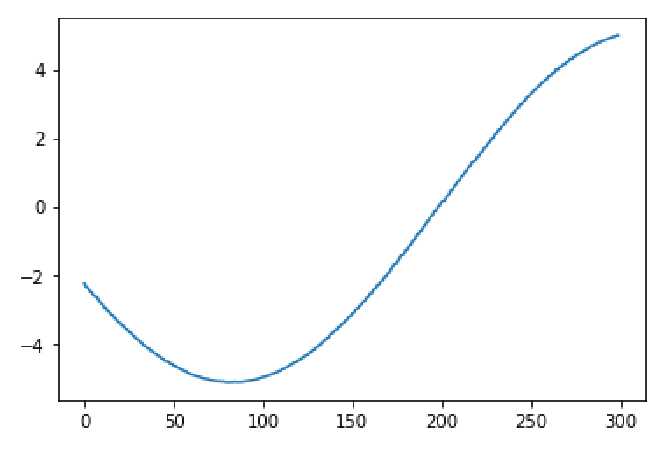

In [64]:
print("Nyquistfrequenz:", 7400/2)

def plot(frequenz):
    kurve = f"Sinus{frequenz}.png"
    kurveZoom = f"Sinus{frequenz}zoom.png"
    print("Frequenz: ", frequenz)
    img = mpimg.imread(kurve)
    plt.axis('off')
    imgplot = plt.imshow(img)
    plt.show()
    plt.subplots(figsize=(30, 8))
    img = mpimg.imread(kurveZoom)
    plt.axis('off')
    imgplot = plt.imshow(img)
    plt.show()
    

for i in (1750, 2300, 3000, 3500, 4000, 4600, 5200, 5800, 6400, 7000):
    plot(i)

